In [ ]:
from Node import DS
from Tools import Func
from Tools import Config
import pandas as pd
import numpy as np
import os
import time
import operator
import sys

import re

def main():
    # set dataset and ground truth file path
    filepath='..\dataset\webdocs'
    pattern='out_.*'
    r=re.compile(pattern)
    filelist=list(filter(r.match,os.listdir(filepath)))    
        # dataset file list

    gr_file_name='webdocs_00_ground_truth.csv'        
    gr_path=os.path.join(filepath,gr_file_name)
        # ground truth path

    # Top and Sketch parameter config
    w=128
    d=64
    size=1024
    Config.Set_default(w,d,size)
        # set width, depth, size of Sk, random seed of hash,e_max
        
    # Initialize Top, Sketch and Sk_head
    Sk_head=[DS.Head(0) for j in range(Config.depth)]
    Sketch=np.zeros((Config.depth,Config.width),dtype='int32')
    Top_dict=dict()
    e_min=DS.Tail("",1)
    
    start=time.time()
    for datafile in filelist[:1]:
        src_data=os.path.join(filepath,datafile)
        with open(src_data,'r') as file:
            while True:
                e=file.readline().strip('\n')
                if not e:
                    print("EOF")
                    break
                else:    
                    item=DS.Tail(e,1)
                    if Top_dict.get(item.ID):
                        # e in Top
                        Top_dict[item.ID]+=1
                    else:
                        if len(Top_dict)<Config.size:
                            Top_dict[item.ID]=1
                        else:
                            Func.UpdateSk(item,Sk_head,Sketch)
                if Config.e_max.count>e_min.count:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # 找dict中的最小key元素
                    e_min=DS.Tail(min_ele,Top_dict[min_ele])
                    Func.BringBack(e_min,Top_dict,Sk_head,Sketch)
                    
    end=time.time()
    print("Top-{},Sketch:{}*{}".format(Config.size,Config.depth,Config.width))
    print("Execution time:{:8.3f} seconds.".format(end-start))
    Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

    # Element-Precision
    tp_set,precision=Func.Get_precision(gr_path,Top_dict)

    # Count ARE/AAE

    startx=time.time()
    top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,4)
    endx=time.time()
    print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
    print("Top_ARE: {:8.6f}".format(top_are))
    print("Top_AAE: {:8.6f}".format(top_aae))
    print("all_ARE: {:8.6f}".format(all_are))
    print("all_AAE: {:8.6f}".format(all_aae))
    print("Estimate time:{:8.3f} seconds.".format(endx-startx))    

    startx=time.time()
    top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,6)
    endx=time.time()
    print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
    print("Top_ARE: {:8.6f}".format(top_are))
    print("Top_AAE: {:8.6f}".format(top_aae))
    print("all_ARE: {:8.6f}".format(all_are))
    print("all_AAE: {:8.6f}".format(all_aae))
    print("Estimate time:{:8.3f} seconds.".format(endx-startx))        
if __name__=='__main__':
    main()

EOF
Top-1024,Sketch:8*2688
Execution time: 165.037 seconds.
Precision:  0.939
Top_dict with 36968 bytes.
Sketch with 86128 bytes.
Sk_head with 1512 bytes.
Total size 124608 bytes, 


lhh_are:0.923771104181728,lhh_aae:2794.625
lhh over_estimate:0, lhh under_estimate:22357
sketch over_estimate:16543, sketch under_estimate:6864540
Find:962, TP:962, FP:62
Top_ARE: 0.006499
Top_AAE: 27.259875
all_ARE: 0.253393
all_AAE: 11.647849
Estimate time:   5.051 seconds.


lhh_are:0.8473245219432941,lhh_aae:2567.875
lhh over_estimate:0, lhh under_estimate:20543
sketch over_estimate:6140823, sketch under_estimate:5912307
Find:962, TP:962, FP:62
Top_ARE: 0.006499
Top_AAE: 27.259875
all_ARE: 8.566325
all_AAE: 20.402752
Estimate time:   8.963 seconds.


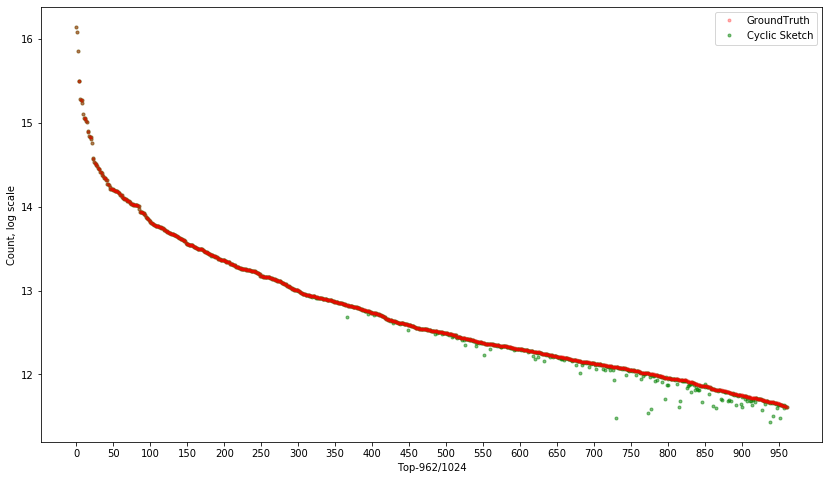

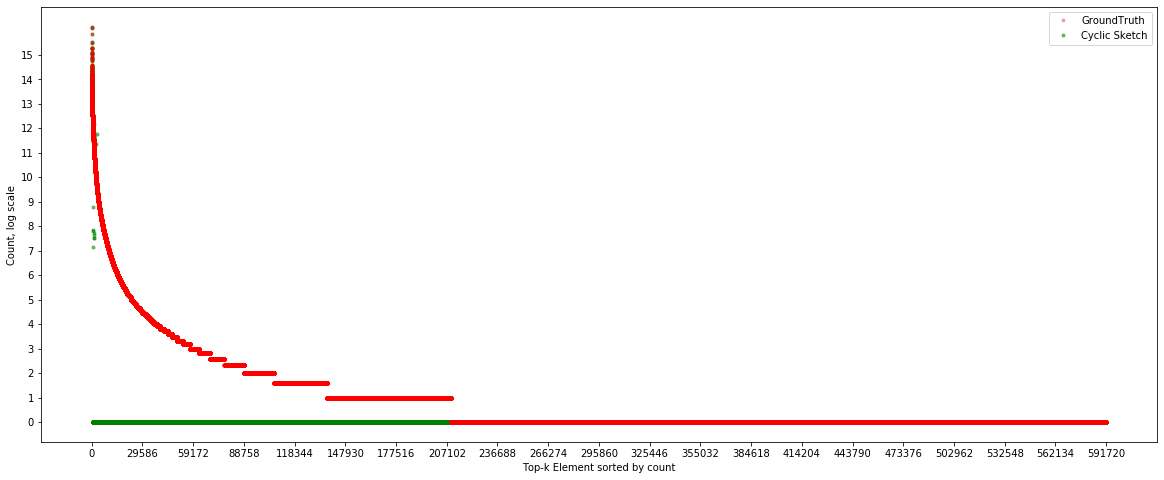

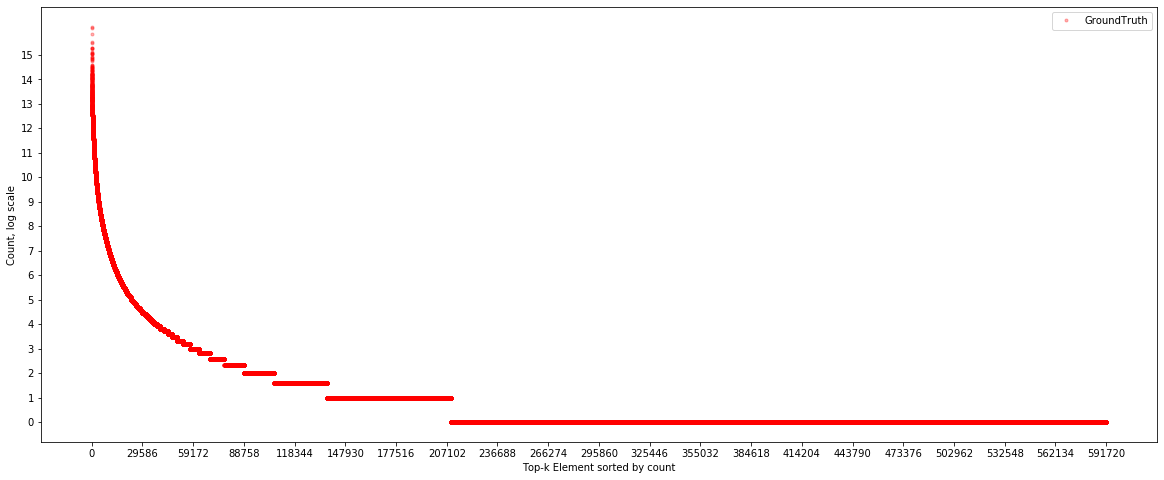

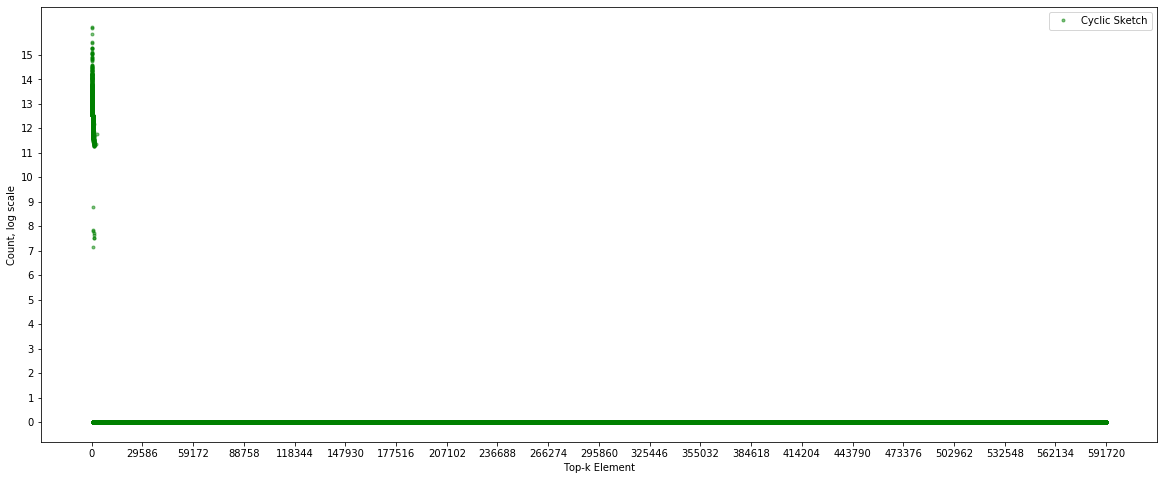

In [2]:
from Node import DS
from Tools import Func
from Tools import Config
import pandas as pd
import numpy as np
import os
import time
import operator
import sys

import re

# set dataset and ground truth file path
filepath='..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path


# Top and Sketch parameter config
w=2688
d=8
size=1024
topk=1024
Config.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash,e_max

# Initialize Top, Sketch and Sk_head
Sk_head=[DS.Head(0) for j in range(Config.depth)]
Sketch=np.zeros((Config.depth,Config.width),dtype='int32')
Top_dict=dict()
e_min=DS.Tail("",1)

start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:    
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<Config.size:
                        Top_dict[item.ID]=1
                    else:
                        Func.UpdateSk(item,Sk_head,Sketch)
            if Config.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                Func.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()
print("Top-{},Sketch:{}*{}".format(Config.size,Config.depth,Config.width))
print("Execution time:{:8.3f} seconds.".format(end-start))
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,Config.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

print("Top_dict with {} bytes.".format(sys.getsizeof(Top_dict)))
print("Sketch with {} bytes.".format(sys.getsizeof(Sketch)))

sk1=sys.getsizeof(Sk_head[0].distinct.__slots__)
sk2=sys.getsizeof(Sk_head[0].count)
sk3=sys.getsizeof(Sk_head[0].maxID)
sk4=sys.getsizeof(Sk_head[0].keep)
sk_sum=sum([sk1,sk2,sk3,sk4])*Config.depth
print("Sk_head with {} bytes.".format(sk_sum))
print("Total size {} bytes, ".format(sys.getsizeof(Top_dict)+sys.getsizeof(Sketch)+sk_sum))

# Count ARE/AAE

'''
startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,5)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,6)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx)) 


startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,4)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))



startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,7)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx)) 
'''


startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,9)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx)) 

startx=time.time()
print("\n")
top_are,top_aae,all_are,all_aae,tp,fp=Func.Get_ARE_AAE(gr_path,Top_dict,Sk_head,Sketch,10)
endx=time.time()
print("Find:{}, TP:{}, FP:{}".format(len(tp_set),tp,fp))
print("Top_ARE: {:8.6f}".format(top_are))
print("Top_AAE: {:8.6f}".format(top_aae))
print("all_ARE: {:8.6f}".format(all_are))
print("all_AAE: {:8.6f}".format(all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx)) 

Func.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
cardinality=[len(i.distinct) for i in Sk_head]
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    My_result[item]=Func.single_query(item,Top_dict,Sk_head,Sketch,cardinality)

Func.Plot_all_compare(ground_truth,My_result,"Cyclic Sketch")

In [ ]:
# set dataset and ground truth file path
filepath='..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

distinct=set()
item_count=0

start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:    
                item_count+=1
                if e not in distinct:
                    # e in Top
                    distinct.add(e)
print(len(distinct))
print(item_count)
    
end=time.time()

In [ ]:
row_cardinality=[len(i.distinct) for i in Sk_head]
print(row_cardinality)

collision_rate=[Config.width/i for i in row_cardinality]
print(collision_rate)

print([i.keep for i in Sk_head])

In [ ]:
print("Sum of Sketch row")
for i in range(len(Sk_head)):
    print(Sk_head[i].count,end=',')
print("\nNumner of distinct elements:")
for i in range(len(Sk_head)):    
    print(len(Sk_head[i].distinct),end=',')
print("\nAvg count for an element in cell:")
for i in range(len(Sk_head)):
    print("{}".format(int(Sk_head[i].count/len(Sk_head[i].distinct))),end=',')
        # int()會無條件捨去

In [ ]:
#[total count: 2989, distinct: 577, max: 22474, keep: 91]
col,row=Func.position(DS.Tail(str(22474),0))
Sketch[row][col]

In [ ]:
import mmh3

filepath='..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    

item_set=set()
data_count=0
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:   
                hash1=mmh3.hash(element.ID,seed=Config.seed[0], signed=False)
                hash2=mmh3.hash(element.ID,seed=Config.seed[1], signed=False)

In [18]:
import math
error_rate=0.1
p = int(math.ceil(math.log((1.04 / error_rate) ** 2, 2)))
m = 1 << p
M = [ 0 for i in range(m)]
print(sys.getsizeof(M))

hll_a=sys.getsizeof(Sk_head[0].distinct.alpha)
hll_b=sys.getsizeof(Sk_head[0].distinct.p)
hll_c=sys.getsizeof(Sk_head[0].distinct.m)
hll_d=(sys.getsizeof(M))
sk2=sys.getsizeof(Sk_head[0].count)
sk3=sys.getsizeof(Sk_head[0].maxID)
sk4=sys.getsizeof(Sk_head[0].keep)

sum([hll_a,hll_b,hll_c,hll_d,sk2,sk3,sk4])*Config.depth

1248


11496